<a href="https://colab.research.google.com/github/swimbeginner/TensorFlow2/blob/main/RepresentationFeatureCross_12232020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Representation with a Feature cross
from google crash course

## Learning Objectives:

After doing this Colab, you'll know how to:

  * Use [`tf.feature_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column) methods to represent features in different ways.
  * Represent features as [bins](https://developers.google.com/machine-learning/glossary/#bucketing). 
  * Cross bins to create a [feature cross](https://developers.google.com/machine-learning/glossary/#feature_cross). 

California housing dataset

In [20]:
%tensorflow_version 2.x

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt
pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format


tf.keras.backend.set_floatx('float32')
print("imported the modules")


imported the modules


In [21]:
#check the format for float numbers in pandas 
a=pd.DataFrame(np.array([[1.22, 2.22],[3.33, 4.44]]), columns=['a','b'])
print(a)

    a   b
0 1.2 2.2
1 3.3 4.4


In [22]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [14]:
train_df.head(5)
features = {name:np.array(value) for name, value in train_df.items()}
print(train_df.items())

<generator object DataFrame.items at 0x7f4dc3dfb308>


In [18]:
DataFrame.item?

Object `DataFrame.item` not found.


#Train model with multiple features.

In [23]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []
# Create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_columns)

In [9]:
print(type(latitude))
print(latitude)

<class 'tensorflow.python.feature_column.feature_column_v2.NumericColumn'>
NumericColumn(key='latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [27]:
def create_model(my_learning_rate, feature_layer):
  model=tf.keras.models.Sequential()
  model.add(feature_layer)
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

def train_model(model, dataset, epochs, batch_size, label_name):
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 1ms/step - loss: 47077.9588 - root_mean_squared_error: 209.2343
Epoch 2/30
170/170 [==============================] - 0s 1ms/step - loss: 13478.7857 - root_mean_squared_error: 116.0889
Epoch 3/30
170/170 [==============================] - 0s 1ms/step - loss: 13455.5311 - root_mean_squared_error: 115.9933
Epoch 4/30
170/170 [==============================] - 0s 1ms/step - loss: 13665.9412 - root_mean_squared_error: 116.8931
Epoch 5/30
170/170 [==============================] - 0s 1ms/step - loss: 13735.5998 - root_mean_squared_error: 117.1882
Epoch 6/30
170/170 [==============================] - 0s 1ms/step - loss: 13576.4572 - root_mean_squared_error: 116.5100
Epoch 7/30
170/170 [==============================] - 0s 1ms/step - loss: 13319.9053 - root_mean_squared_error: 115.4082
Epoch 8/30
170/170 [=======================

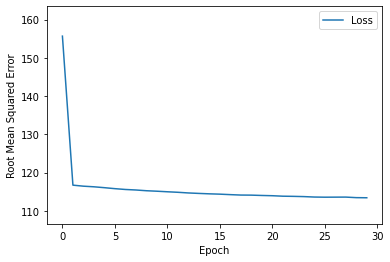


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 1ms/step - loss: 12195.7490 - root_mean_squared_error: 110.4344


[12195.7490234375, 110.43436431884766]

In [28]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Represent latitude and longitude in buckets

The following code cell represents latitude and longitude in buckets (bins). Each bin represents all the neighborhoods within a single degree. For example,
neighborhoods at latitude 35.4 and 35.8 are in the same bucket, but neighborhoods in latitude 35.4 and 36.2 are in different buckets. 

The model will learn a separate weight for each bucket. For example, the model will learn one weight for all the neighborhoods in the "35" bin", a different weight for neighborhoods in the "36" bin, and so on. This representation will create approximately 20 buckets:
 
  * 10 buckets for `latitude`. 
  * 10 buckets for `longitude`. 

In [30]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), 
                                     int(max(train_df['latitude'])), 
                                     resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, 
                                               latitude_boundaries)
feature_columns.append(latitude)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), 
                                      int(max(train_df['longitude'])), 
                                      resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer = layers.DenseFeatures(feature_columns)

In [32]:
print(latitude_boundaries, longitude_boundaries)

[32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0] [-124.0, -123.0, -122.0, -121.0, -120.0, -119.0, -118.0, -117.0, -116.0, -115.0]


Epoch 1/35
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 1ms/step - loss: 54034.4251 - root_mean_squared_error: 232.4347
Epoch 2/35
170/170 [==============================] - 0s 1ms/step - loss: 47177.1401 - root_mean_squared_error: 217.1523
Epoch 3/35
170/170 [==============================] - 0s 1ms/step - loss: 39273.0646 - root_mean_squared_error: 198.1640
Epoch 4/35
170/170 [==============================] - 0s 1ms/step - loss: 33350.3876 - root_mean_squared_error: 182.5990
Epoch 5/35
170/170 [==============================] - 0s 1ms/step - loss: 28136.1305 - root_mean_squared_error: 167.7150
Epoch 6/35
170/170 [==============================] - 0s 1ms/step - loss: 24255.3155 - root_mean_squared_error: 155.7112
Epoch 7/35
170/170 [==============================] - 0s 1ms/step - loss: 20639.4532 - root_mean_squared_error: 143.6283
Epoch 8/35
170/170 [=======================

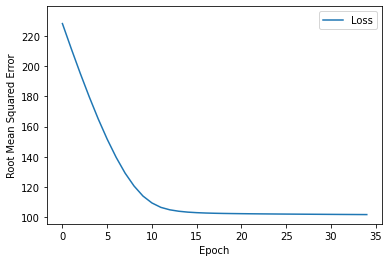


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 1ms/step - loss: 10199.4385 - root_mean_squared_error: 100.9923


[10199.4384765625, 100.99227142333984]

In [33]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the buckets_feature_layer.
my_model = create_model(learning_rate, buckets_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

##Feature Crosses representation

In [38]:
resolution_in_degrees = 0.5 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=400)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 55321.3777 - root_mean_squared_error: 235.1808
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 50741.6471 - root_mean_squared_error: 225.2385
Epoch 3/35
170/170 [==============================] - 0s 1ms/step - loss: 45718.9862 - root_mean_squared_error: 213.8055
Epoch 4/35
170/170 [==============================] - 0s 1ms/step - loss: 40887.0146 - root_mean_squared_error: 202.1976
Epoch 5/35
170/170 [==============================] - 0s 2ms/step - loss: 37225.6589 - root_mean_squared_error: 192.9270
Epoch 6/35
170/170 [==============================] - 0s 2ms/step - loss: 33795.1150 - root_mean_squared_error: 183.8070
Epoch 7/35
170/170 [==============================] - 0s 2ms/step - loss: 29790.9216 - root_mean_squared_error: 172.5776
Epoch 8/35
170/170 [=======================

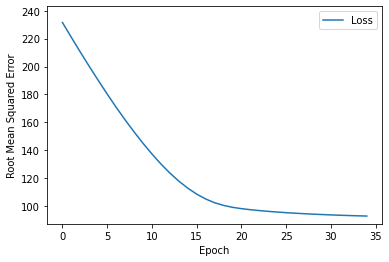


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 1ms/step - loss: 8580.8779 - root_mean_squared_error: 92.6330


[8580.8779296875, 92.63302612304688]

In [39]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)